In [1]:
# Higher ESG ratings are generally positively correlated with valuation and profitability while negatively correlated with volatility.
# natural language processing (NLP) techniques and graph analytics to extract key strategic ESG initiatives and learn companies’ relationships in a global market and their impact to market risk calculations.
# extract the key ESG initiatives as communicated in yearly PDF reports
# compare these with the actual media coverage from news analytics data.
# transform a word into its simpler grammatical form, such as past tenses transformed to present form or plural form converted to singular


In [2]:
# Extracting statements from ESG reports



Barclays	https://home.barclays/content/dam/home-barclays/documents/citizenship/ESG/Barclays-PLC-ESG-Report-2019.pdf

JP Morgan Chase	https://impact.jpmorganchase.com/content/dam/jpmc/jpmorgan-chase-and-co/documents/jpmc-cr-esg-report-2019.pdf

Morgan Stanley	https://www.morganstanley.com/pub/content/dam/msdotcom/sustainability/Morgan-Stanley_2019-Sustainability-Report_Final.pdf

Goldman Sachs	https://www.goldmansachs.com/what-we-do/sustainable-finance/documents/reports/2019-sustainability-report.pdf

In [3]:
from io import StringIO
import pandas as pd
 
csv_str = """company,url
bank of america,https://www.responsibilityreports.com/Click/2522
barclays,https://www.responsibilityreports.com/Click/2297
canadian imperial bank,https://www.responsibilityreports.com/Click/1894
citigroup,https://www.responsibilityreports.com/Click/1515
eurobank,https://www.responsibilityreports.com/Click/3126
jpmorgan chase,https://www.responsibilityreports.com/Click/1278
keybank,https://www.responsibilityreports.com/Click/1599
laurentian bank of canada,https://www.responsibilityreports.com/Click/1918
national australia bank 1,https://www.responsibilityreports.com/Click/1555
national bank greece,https://www.responsibilityreports.com/Click/3104
pnc,https://www.responsibilityreports.com/Click/1829
standard chartered,https://www.responsibilityreports.com/Click/2781
tcf financial,https://www.responsibilityreports.com/Click/1669
wells fargo,https://www.responsibilityreports.com/Click/1904
ameriprise,https://www.responsibilityreports.com/Click/1784
janus henderson,https://www.responsibilityreports.com/Click/2813
t rowe price,https://www.responsibilityreports.com/Click/2044
lazard,https://www.responsibilityreports.com/Click/1429
capital one,https://www.responsibilityreports.com/Click/1640
goldman sachs,https://www.responsibilityreports.com/Click/1496"""
 
esg_df = pd.read_csv(StringIO(csv_str))
esg_df

,company,url
0,bank of america,https://www.responsibilityreports.com/Click/2522
1,barclays,https://www.responsibilityreports.com/Click/2297
2,canadian imperial bank,https://www.responsibilityreports.com/Click/1894
3,citigroup,https://www.responsibilityreports.com/Click/1515
4,eurobank,https://www.responsibilityreports.com/Click/3126
5,jpmorgan chase,https://www.responsibilityreports.com/Click/1278
6,keybank,https://www.responsibilityreports.com/Click/1599
7,laurentian bank of canada,https://www.responsibilityreports.com/Click/1918
8,national australia bank 1,https://www.responsibilityreports.com/Click/1555
9,national bank greece,https://www.responsibilityreports.com/Click/3104


In [4]:
!pip install PyPDF2

In [5]:
import requests
from PyPDF2 import PdfFileReader
from io import BytesIO
 
def extract_content(url):
  response = requests.get(url)
  open_pdf_file = BytesIO(response.content)
  pdf = PdfFileReader(open_pdf_file, strict=False)  
  text = [pdf.getPage(i).extractText() for i in range(0, pdf.getNumPages())]
  return "\n".join(text)
 
esg_df['content'] = esg_df['url'].apply(extract_content)
esg_df.head()

,company,url,content
0,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...
1,barclays,https://www.responsibilityreports.com/Click/2297,Making a \n\nBarclays PLC\n Environmental Soci...
2,canadian imperial bank,https://www.responsibilityreports.com/Click/1894,1Sustainability Report\n 2020\n˜˚˛ Client˝foc...
3,citigroup,https://www.responsibilityreports.com/Click/1515,˜˚˛˝\n˙ˆ\n\n\nˇ\n\n\n\n\n˘ˆ\n˜˚˛˝˙ˆ\n˙˜˚˛˛˚˝˙ˆ...
4,eurobank,https://www.responsibilityreports.com/Click/3126,CORPORATE RESPONSIBILITY REPORT\n2018\n˜˚˛˝˙ˆ˚...


In [6]:
# clean pdf
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import string
import re
 
def extract_statements(text):
  
  # remove non ASCII characters
  printable = set(string.printable)
  text = ''.join(filter(lambda x: x in printable, text))
  
  lines = []
  prev = ""
  for line in text.split('\n'):
    # aggregate consecutive lines where text may be broken down
    # only if next line starts with a space or previous does not end with a dot.
    if(line.startswith(' ') or not prev.endswith('.')):
        prev = prev + ' ' + line
    else:
        # new paragraph
        lines.append(prev)
        prev = line
        
  # don't forget left-over paragraph
  lines.append(prev)
 
  # clean paragraphs from extra space, unwanted characters, urls, etc.
  # best effort clean up, consider a more versatile cleaner
  sentences = []
  
  for line in lines:
      # removing header number
      line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
      # removing trailing spaces
      line = line.strip()
      # words may be split between lines, ensure we link them back together
      line = re.sub(r'\s?-\s?', '-', line)
      # remove space prior to punctuation
      line = re.sub(r'\s?([,:;\.])', r'\1', line)
      # ESG contains a lot of figures that are not relevant to grammatical structure
      line = re.sub(r'\d{5,}', r' ', line)
      # remove mentions of URLs
      line = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', line)
      # remove multiple spaces
      line = re.sub(r'\s+', ' ', line)
      # remove multiple dot
      line = re.sub(r'\.+', '.', line)
      
      # split paragraphs into well defined sentences using nltk
      for part in nltk.sent_tokenize(line):
        sentences.append(str(part).strip())
 
  return sentences   
 
esg_df['statement'] = esg_df['content'].apply(extract_statements)
esg_df = esg_df.explode('statement').reset_index(drop=True)
esg_df.head()

,company,url,content,statement
0,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,HUMAN CAPITAL MANAGEMENT REPORT Published Octo...
1,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,"At Bank of America, we ask this question every..."
2,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,"It is at the core of how we live our values, d..."
3,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,Deliver together Act responsibly Realize the p...
4,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,This is possible only because of our more than...


In [8]:
# Learn topics
# sumarize complex CSR reports into a specific ESG related themes
import gensim
from gensim.parsing.preprocessing import STOPWORDS
 
# context specific keywords not to include in topic modelling
org_stop_words = [
  'plc', 'group', 'target',
  'track', 'capital', 'holding',
  'report', 'annual', 'barclay',
  'esg', 'bank', 'report', 'csr',
  'disclosure', 'sustainable', 'sustainability'
  'corporate', 'responsibility',
  'million', 'billion',
]
 
# add company names as stop words
organisations = set(esg_df['company'])
for organisation in organisations:
    for t in organisation.split(' '):
        org_stop_words.append(t)
 
# our list contains all english stop words + companies names + specific keywords
stop_words = STOPWORDS.union(org_stop_words)
stop_words

frozenset({'1',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'america',
           'ameriprise',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'annual',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'australia',
           'back',
           'bank',
           'barclay',
           'barclays',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becomi

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.utils import simple_preprocess
 
def lemmatize(text):
  results = []
  lemmatizer = WordNetLemmatizer()
  stemmer = PorterStemmer()
  for token in simple_preprocess(text):
    stem = stemmer.stem(lemmatizer.lemmatize(token))
    if (len(stem) > 3):
      results.append(stem)
  return ' '.join(results)
 
esg_df['lemma'] = esg_df['statement'].apply(lemmatize)
esg_df = esg_df[esg_df['lemma'].str.len() > 100]
corpus = esg_df.lemma
esg_df

,company,url,content,statement,lemma
0,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,HUMAN CAPITAL MANAGEMENT REPORT Published Octo...,human capit manag report publish octob tabl co...
3,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,Deliver together Act responsibly Realize the p...,deliv togeth respons realiz power peopl trust ...
5,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,"Last year, we introduced our Human Capital Man...",last year introduc human capit manag report pr...
8,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,"Since our initial report, we have taken extens...",sinc initi report have taken extens step care ...
9,bank of america,https://www.responsibilityreports.com/Click/2522,2020 HUMAN CAPITAL MANAGEMENT REPORT \nPublish...,"And, we continue to make long-term investments...",continu make long term invest support racial e...
...,...,...,...,...,...
11214,goldman sachs,https://www.responsibilityreports.com/Click/1496,Goldman Sachs 2019 Sustainability Report\nSUST...,This material does not purport to contain a co...,materi purport contain comprehens overview gol...
11217,goldman sachs,https://www.responsibilityreports.com/Click/1496,Goldman Sachs 2019 Sustainability Report\nSUST...,Forward-looking statements are not historical ...,forward look statement histor fact instead rep...
11218,goldman sachs,https://www.responsibilityreports.com/Click/1496,Goldman Sachs 2019 Sustainability Report\nSUST...,It is possible that the rms actual results may...,possibl that actual result differ possibl mate...
11219,goldman sachs,https://www.responsibilityreports.com/Click/1496,Goldman Sachs 2019 Sustainability Report\nSUST...,For information about some of the risks and im...,inform about some risk import factor that coul...


In [10]:
!pip install hyperopt

In [11]:
# Tuning LDA
# using hyperopts to tune parameters of a LDA model
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(
  stop_words = stop_words,
  ngram_range = (1,1)
)
 
vec_model = vectorizer.fit(corpus)


from sklearn.decomposition import LatentDirichletAllocation
from hyperopt import fmin, hp, tpe, STATUS_OK
import numpy as np
 
def train_model(params):
  
  # define our LDA parameters
  lda = LatentDirichletAllocation(
    n_components=int(params['n_components']),
    learning_method='batch',
    learning_decay=float(params['learning_decay']),
    max_iter=150,
    # n_jobs=int(getParam("num_executors")),
    evaluate_every=3,
    random_state=42, 
    verbose=True
  )
  
  # train a model
  X = vec_model.transform(corpus)
  lda.fit(X)
 
  # minimizing perplexity at each step
  loss = lda.perplexity(X)
  return {'status': STATUS_OK, 'loss': loss}

# grid search our optimal number of topics and learning decay
search_space = {
  'n_components': hp.quniform('n_components', 5, 12, 1),
  'learning_decay': hp.quniform('learning_decay', 0.65, 0.8, 0.05),
}
 
# we define the number of executors we have at our disposal
# spark_trials = SparkTrials(parallelism=int(getParam("num_executors")))
 
# we retrieve the set of parameters that minimize our loss function
best_params = fmin(
  fn=train_model, 
  space=search_space, 
  algo=tpe.suggest, 
  max_evals=20, 
  # trials=spark_trials, 
  rstate=np.random.RandomState(123)
)

best_params


iteration: 1 of max_iter: 150
iteration: 2 of max_iter: 150
iteration: 3 of max_iter: 150, perplexity: 1679.2236
iteration: 4 of max_iter: 150
iteration: 5 of max_iter: 150
iteration: 6 of max_iter: 150, perplexity: 1518.5414
iteration: 7 of max_iter: 150
iteration: 8 of max_iter: 150
iteration: 9 of max_iter: 150, perplexity: 1456.4116
iteration: 10 of max_iter: 150
iteration: 11 of max_iter: 150
iteration: 12 of max_iter: 150, perplexity: 1426.1988
iteration: 13 of max_iter: 150
iteration: 14 of max_iter: 150
iteration: 15 of max_iter: 150, perplexity: 1410.1560
iteration: 16 of max_iter: 150
iteration: 17 of max_iter: 150
iteration: 18 of max_iter: 150, perplexity: 1401.2429
iteration: 19 of max_iter: 150
iteration: 20 of max_iter: 150
iteration: 21 of max_iter: 150, perplexity: 1396.0953
iteration: 22 of max_iter: 150
iteration: 23 of max_iter: 150
iteration: 24 of max_iter: 150, perplexity: 1393.0845
iteration: 25 of max_iter: 150
iteration: 26 of max_iter: 150
iteration: 27 of ma

KeyboardInterrupt: ignored

In [12]:
best_params = {'learning_decay': 0.8, 'n_components': 5.0}

In [ ]:
!pip install mlflow

In [13]:
import mlflow
from sklearn.pipeline import make_pipeline
 
with mlflow.start_run(run_name='esg_lda') as run:
 
  lda = LatentDirichletAllocation(
    n_components=int(best_params['n_components']),
    learning_decay=float(best_params['learning_decay']),
    learning_method='batch',
    max_iter=150,
    # n_jobs=int(getParam("num_executors")),
    evaluate_every=3,
    random_state=42,
    verbose=True
  )
  
  mlflow.log_param("n_components", best_params['n_components'])
  mlflow.log_param("learning_decay", best_params['learning_decay'])
  
  # train pipeline
  pipeline = make_pipeline(vec_model, lda)
  pipeline.fit(corpus)
 
  # log model
  mlflow.sklearn.log_model(pipeline, 'pipeline')
  
  # Mlflow run ID
  lda_run_id = mlflow.active_run().info.run_id

iteration: 1 of max_iter: 150
iteration: 2 of max_iter: 150
iteration: 3 of max_iter: 150, perplexity: 1539.1495
iteration: 4 of max_iter: 150
iteration: 5 of max_iter: 150
iteration: 6 of max_iter: 150, perplexity: 1430.6659
iteration: 7 of max_iter: 150
iteration: 8 of max_iter: 150
iteration: 9 of max_iter: 150, perplexity: 1386.6826
iteration: 10 of max_iter: 150
iteration: 11 of max_iter: 150
iteration: 12 of max_iter: 150, perplexity: 1362.7327
iteration: 13 of max_iter: 150
iteration: 14 of max_iter: 150
iteration: 15 of max_iter: 150, perplexity: 1348.3065
iteration: 16 of max_iter: 150
iteration: 17 of max_iter: 150
iteration: 18 of max_iter: 150, perplexity: 1340.2163
iteration: 19 of max_iter: 150
iteration: 20 of max_iter: 150
iteration: 21 of max_iter: 150, perplexity: 1335.3614
iteration: 22 of max_iter: 150
iteration: 23 of max_iter: 150
iteration: 24 of max_iter: 150, perplexity: 1331.6187
iteration: 25 of max_iter: 150
iteration: 26 of max_iter: 150
iteration: 27 of ma

In [ ]:
!pip install pyLDAvis

In [14]:
# The left panel visualise the topics as circles in the two-dimensional plane whose centres are determined by computing the Jensen–Shannon divergence between topics
# The right panel depicts a horizontal bar chart whose bars represent the individual terms that are the most useful for interpreting the currently selected topic on the left. 
# A pair of overlaid bars represent both the corpus-wide frequency of a given term as well as the topic-specific frequency of the term. 

import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, vectorizer.transform(corpus), vectorizer, mds='tsne')


Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations [pairwise.py:56]
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations [_t_sne.py:348]
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations [_t_sne.py:349]
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations [_t_sne.py:348]
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations [_t_sne.py:349]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  27.092617
4       51.163364 -159.968018       2        1  23.494588
1      -73.144554   21.523815       3        1  19.111341
3      -66.410133 -110.606438       4        1  16.673213
0       54.417324   12.443444       5        1  13.628241, topic_info=         Term        Freq       Total Category  logprob  loglift
3281   invest  761.000000  761.000000  Default  30.0000  30.0000
1879   divers  456.000000  456.000000  Default  29.0000  29.0000
3108   inclus  374.000000  374.000000  Default  28.0000  28.0000
1211   climat  503.000000  503.000000  Default  27.0000  27.0000
2131   energi  328.000000  328.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
6230     term   74.424636  179.744270   Topic5  -5.3992   1.1113
2419  financi   84.489023  342.495542   Topic5  -5.2724   0.5934
5003   provid   94.959265  633.578766   Topic5  -5.1555   0.0951
6080  support   89.542334  945.355959   Topic5  -5.2143  -0.3638
1461   corpor   76.946072  580.418946   Topic5  -5.3659  -0.0276

[369 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
35        2  0.693864   access
35        3  0.140332   access
35        4  0.007796   access
35        5  0.155924   access
48        1  0.546196  account
...     ...       ...      ...
7004      5  0.068914     year
7019      2  0.951868    young
7019      5  0.030705    young
7032      2  0.043356     zero
7032      4  0.953835     zero

[640 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 4, 1])

In [22]:

topics = [str(x) for x in list(np.arange(0, int(best_params['n_components'])))]
topics

['0', '1', '2', '3', '4']

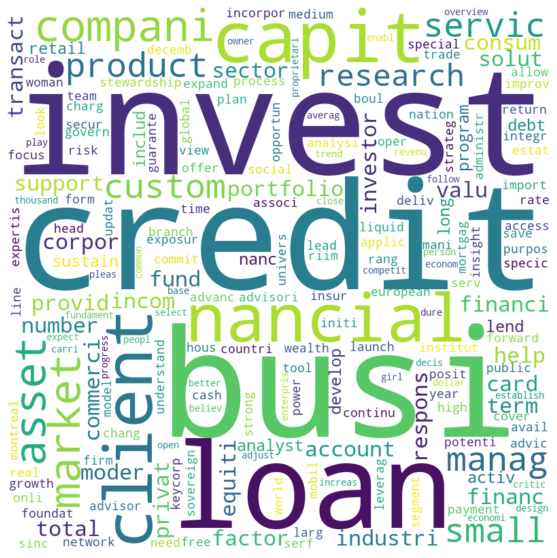

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
def word_cloud(model, tf_feature_names, index):
    
    imp_words_topic=""
    comp = model.components_[index]
    tfs = ['_'.join(t.split(' ')) for t in tf_feature_names]
    vocab_comp = zip(tfs, comp)
    sorted_words = sorted(vocab_comp, key = lambda x:x[1], reverse=True)[:200]
    
    for word in sorted_words:
        imp_words_topic = imp_words_topic + " " + word[0]
    
    return WordCloud(
        background_color="white",
        width=800, 
        height=800, 
        contour_width=2, 
        contour_color='steelblue'
    ).generate(imp_words_topic)
    
topic = 0 # could also be 1, 2,3,4 
tf_feature_names = vec_model.get_feature_names()
wordcloud = word_cloud(lda, tf_feature_names, topic)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [28]:
# Topics
topic_names = [
  [0, "G", "customer obsessed"],
  [1, "S", "valuing employees"],
  [2, "G", "code of conduct"],
  [3, "E", "energy transition"],
  [4, "S", "community support"],
]
 
topic_names_df = pd.DataFrame(topic_names, columns=['id', 'topic', 'policy'])
topic_names_df

,id,topic,policy
0,0,G,customer obsessed
1,1,S,valuing employees
2,2,G,code of conduct
3,3,E,energy transition
4,4,S,community support


In [39]:
esg_predictions = esg_df.drop(columns=['content', 'lemma'], axis=1)
esg_predictions['probabilities'] = pipeline.transform(corpus).tolist()
esg_predictions

,company,url,statement,probabilities
0,bank of america,https://www.responsibilityreports.com/Click/2522,HUMAN CAPITAL MANAGEMENT REPORT Published Octo...,"[0.004420074445198778, 0.566952793529077, 0.18..."
3,bank of america,https://www.responsibilityreports.com/Click/2522,Deliver together Act responsibly Realize the p...,"[0.1580098867642686, 0.4785540740549548, 0.229..."
5,bank of america,https://www.responsibilityreports.com/Click/2522,"Last year, we introduced our Human Capital Man...","[0.1421440041652693, 0.012197694284607022, 0.1..."
8,bank of america,https://www.responsibilityreports.com/Click/2522,"Since our initial report, we have taken extens...","[0.013402936496884421, 0.3519323066002665, 0.0..."
9,bank of america,https://www.responsibilityreports.com/Click/2522,"And, we continue to make long-term investments...","[0.009945933634223785, 0.960941557318477, 0.00..."
...,...,...,...,...
11214,goldman sachs,https://www.responsibilityreports.com/Click/1496,This material does not purport to contain a co...,"[0.012929053326165878, 0.20433141778042072, 0...."
11217,goldman sachs,https://www.responsibilityreports.com/Click/1496,Forward-looking statements are not historical ...,"[0.33819136454512716, 0.010663729225523142, 0...."
11218,goldman sachs,https://www.responsibilityreports.com/Click/1496,It is possible that the rms actual results may...,"[0.18533738327503207, 0.015716356336201647, 0...."
11219,goldman sachs,https://www.responsibilityreports.com/Click/1496,For information about some of the risks and im...,"[0.39985218025787744, 0.011368148943502706, 0...."


In [40]:
df = esg_predictions.copy()
df['id'] = df['probabilities'].apply(lambda x: np.argmax(x))
df['probability'] = df['probabilities'].apply(lambda x: np.max(x))
df

,company,url,statement,probabilities,id,probability
0,bank of america,https://www.responsibilityreports.com/Click/2522,HUMAN CAPITAL MANAGEMENT REPORT Published Octo...,"[0.004420074445198778, 0.566952793529077, 0.18...",1,0.566953
3,bank of america,https://www.responsibilityreports.com/Click/2522,Deliver together Act responsibly Realize the p...,"[0.1580098867642686, 0.4785540740549548, 0.229...",1,0.478554
5,bank of america,https://www.responsibilityreports.com/Click/2522,"Last year, we introduced our Human Capital Man...","[0.1421440041652693, 0.012197694284607022, 0.1...",4,0.674557
8,bank of america,https://www.responsibilityreports.com/Click/2522,"Since our initial report, we have taken extens...","[0.013402936496884421, 0.3519323066002665, 0.0...",4,0.607624
9,bank of america,https://www.responsibilityreports.com/Click/2522,"And, we continue to make long-term investments...","[0.009945933634223785, 0.960941557318477, 0.00...",1,0.960942
...,...,...,...,...,...,...
11214,goldman sachs,https://www.responsibilityreports.com/Click/1496,This material does not purport to contain a co...,"[0.012929053326165878, 0.20433141778042072, 0....",2,0.540535
11217,goldman sachs,https://www.responsibilityreports.com/Click/1496,Forward-looking statements are not historical ...,"[0.33819136454512716, 0.010663729225523142, 0....",3,0.629468
11218,goldman sachs,https://www.responsibilityreports.com/Click/1496,It is possible that the rms actual results may...,"[0.18533738327503207, 0.015716356336201647, 0....",3,0.767332
11219,goldman sachs,https://www.responsibilityreports.com/Click/1496,For information about some of the risks and im...,"[0.39985218025787744, 0.011368148943502706, 0....",2,0.565919


In [41]:
df_merged = df.merge(topic_names_df, on='id').drop(['probabilities', 'id', 'url'], axis=1)
df_merged

,company,statement,probability,topic,policy
0,bank of america,HUMAN CAPITAL MANAGEMENT REPORT Published Octo...,0.566953,S,valuing employees
1,bank of america,Deliver together Act responsibly Realize the p...,0.478554,S,valuing employees
2,bank of america,"And, we continue to make long-term investments...",0.960942,S,valuing employees
3,bank of america,We have made regular increases over several ye...,0.595410,S,valuing employees
4,bank of america,4-year commitment to accelerate work underway ...,0.954831,S,valuing employees
...,...,...,...,...,...
5128,goldman sachs,Climate change may also have a negative impact...,0.652028,G,customer obsessed
5129,goldman sachs,But physical risks may also inuence the value ...,0.545360,G,customer obsessed
5130,goldman sachs,We assume that the concentration of GHGs incre...,0.549621,G,customer obsessed
5131,goldman sachs,A signicant part of our client nancings in our...,0.462134,G,customer obsessed


In [42]:
# Retrieve initiatives: Using a partitioning window, we extract the most descriptive policies for each organization.
# simplify a complex PDF document of hundreds of pages into specific initiatives
# answering questions like "What did company X do with regards to environmental policy?"
df_merged.sort_values(['company','probability'], ascending=False).groupby('company').head(1)

,company,statement,probability,topic,policy
1727,wells fargo,"Sincerely, Charles W. Scharf CEO Wells Fargo &...",0.974526,S,community support
2817,tcf financial,"Donateable Food (Dry Goods, Prepared Foods, Pe...",0.981175,E,energy transition
2906,t rowe price,Global Temperature Rise Target Reduction Neede...,0.971712,E,energy transition
519,standard chartered,Pillar 1 Pillar 2 Pillar 3 Sustainablity Data ...,0.995445,S,valuing employees
4163,pnc,Our expectations of our third parties around c...,0.983206,G,code of conduct
3958,national bank greece,"gr/en, section: Group / Corporate Governance /...",0.989772,G,code of conduct
2686,national australia bank 1,Supporting customers Colleague capability and ...,0.985080,E,energy transition
603,lazard,Engaging Our People Lazard Womens Leadership N...,0.991766,S,valuing employees
4688,laurentian bank of canada,Address City Province Postal code Opened 1699 ...,0.990320,G,customer obsessed
2500,keybank,8% Reduction in total energy consumed YOY Tota...,0.981659,E,energy transition


In [53]:
# "How much more does company X focus on the wellbeing of their employees compare to company Y?"
esg_group = esg_predictions.copy()
esg_group['topics'] = esg_group['probabilities'].apply(lambda xs: [[i, x] for i, x in enumerate(xs)])
esg_group = esg_group.explode('topics').reset_index(drop=True)
esg_group['id'] = esg_group['topics'].apply(lambda x: x[0])
esg_group['probability'] = esg_group['topics'].apply(lambda x: x[1])
esg_group = esg_group[['company', 'id', 'probability']]
esg_group = esg_group.merge(topic_names_df, on='id')
esg_group = pd.pivot_table(
  esg_group, 
  values='probability', 
  index='company',
  columns=['policy'], 
  aggfunc=np.sum)
esg_group

policy,code of conduct,community support,customer obsessed,energy transition,valuing employees
company,,,,,
ameriprise,10.889752,6.272868,7.618564,3.070558,19.148258
bank of america,11.183208,41.314794,6.014248,4.002684,58.485065
barclays,155.196170,50.840580,30.991447,47.090240,22.881563
canadian imperial bank,121.763865,104.061016,48.510177,43.762985,148.901957
capital one,48.484950,335.439408,87.954363,66.344545,174.776735
citigroup,21.016317,0.593235,2.051494,10.982180,1.356774
eurobank,177.903480,136.491711,63.349268,77.109490,47.146050
goldman sachs,84.478357,68.618562,79.543227,150.491229,82.868625
janus henderson,9.750316,37.905942,11.897484,9.177195,19.269064


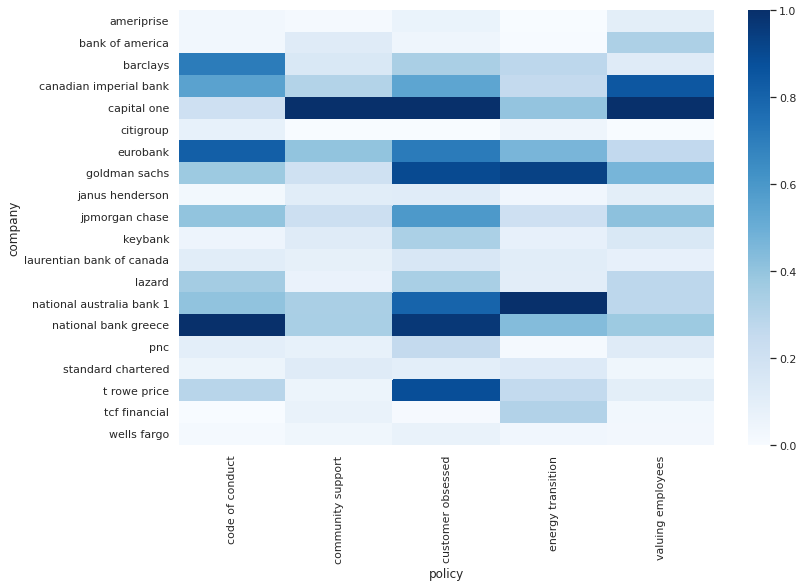

In [56]:
# scale topic frequency between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
esg_focus = pd.DataFrame(scaler.fit_transform(esg_group), columns=esg_group.columns)
esg_focus.index = esg_group.index
 
# plot heatmap, showing main area of focus for each company across topics we learned
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(esg_focus, annot=False, cmap='Blues')
plt.show()

In [62]:
# CSR score
# how much a company talks about ESG vs. how much they walk the talk.
topics = topic_names_df
topics_b = list(zip(topics.topic, topics.policy))
topics_b

[('G', 'customer obsessed'),
 ('S', 'valuing employees'),
 ('G', 'code of conduct'),
 ('E', 'energy transition'),
 ('S', 'community support')]

In [67]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 42.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=d67214e818a2c645e2b21ee78f11fae551e83879c4d06a9ccbf04540c6a510df
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [84]:
df_merged.sort_values(['company','probability'], ascending=False).groupby(['company','topic','policy']).head(3)

,company,statement,probability,topic,policy
1727,wells fargo,"Sincerely, Charles W. Scharf CEO Wells Fargo &...",0.974526,S,community support
526,wells fargo,"Additionally, to help veterans integrate into ...",0.967492,S,valuing employees
1734,wells fargo,CHARLES W. SCHARF 1515 2019 highlightsEconomic...,0.966089,S,community support
2875,wells fargo,Forward-looking statements can be identied by ...,0.961223,E,energy transition
1724,wells fargo,"For our communities, the Wells Fargo Foundatio...",0.955096,S,community support
...,...,...,...,...,...
1742,ameriprise,pro-bono nancial planning support area helping...,0.638041,S,community support
2879,ameriprise,Encouraging recycling and electronic delivery ...,0.632658,E,energy transition
4873,ameriprise,"Power recognized Ameriprise for providing ""An ...",0.507667,G,customer obsessed
2880,ameriprise,Managing climate issues As a responsible envir...,0.506800,E,energy transition


In [138]:
csr_summary = df_merged.groupby(['company','topic','policy']).mean().reset_index()
csr_summary["count"] = df_merged.groupby(['company','topic','policy']).count().reset_index()["statement"].values
csr_summary = csr_summary.rename(columns={"probability": "esg", "company":"organisation"})
csr_summary

,organisation,topic,policy,esg,count
0,ameriprise,E,energy transition,0.517473,3
1,ameriprise,G,code of conduct,0.677238,10
2,ameriprise,G,customer obsessed,0.565123,7
3,ameriprise,S,community support,0.646412,6
4,ameriprise,S,valuing employees,0.721418,21
...,...,...,...,...,...
93,wells fargo,E,energy transition,0.693891,10
94,wells fargo,G,code of conduct,0.609448,6
95,wells fargo,G,customer obsessed,0.567184,9
96,wells fargo,S,community support,0.668753,15


In [139]:
# normalization
from scipy.stats import percentileofscore

esg_scores = csr_summary.groupby(['topic', 'policy'])['esg'].agg(list)
esg_scores_norm = pd.DataFrame(esg_scores).rename({'esg': 'esg_dist'}, axis=1)
esg_norm = csr_summary.merge(esg_scores_norm, left_on=['topic', 'policy'], right_on=['topic', 'policy'])
def norm(score, dist):
  return percentileofscore(dist, score)
 
esg_norm['esg'] = esg_norm.apply(lambda x: norm(x.esg, x.esg_dist), axis=1)
esg_norm['confidence'] = pd.cut(esg_norm['count'], 3, labels=["poor", "medium", "high"])
 
esg_norm = esg_norm[['topic', 'policy', 'organisation', 'esg', 'confidence']]
esg_norm

,topic,policy,organisation,esg,confidence
0,E,energy transition,ameriprise,5.000000,poor
1,E,energy transition,bank of america,10.000000,poor
2,E,energy transition,barclays,70.000000,poor
3,E,energy transition,canadian imperial bank,35.000000,poor
4,E,energy transition,capital one,55.000000,poor
...,...,...,...,...,...
93,S,valuing employees,pnc,42.105263,poor
94,S,valuing employees,standard chartered,100.000000,poor
95,S,valuing employees,t rowe price,10.526316,poor
96,S,valuing employees,tcf financial,5.263158,poor


In [155]:
esg_norm[esg_norm.organisation=="ameriprise"]

,topic,policy,organisation,esg,confidence
0,E,energy transition,ameriprise,5.000000,poor
20,G,code of conduct,ameriprise,55.000000,poor
40,G,customer obsessed,ameriprise,20.000000,poor
60,S,community support,ameriprise,15.789474,poor
79,S,valuing employees,ameriprise,73.684211,poor


In [165]:
# represent companies ESG focus across the E, S and G using a simple bar chart.
esg_csr_data = esg_norm.groupby(["organisation","topic"])["esg"].mean().reset_index()
esg_csr_data["esg"] = esg_csr_data["esg"]/3
esg_csr_data = esg_csr_data.pivot(index='organisation', columns='topic', values='esg')
esg_csr_data

topic,E,G,S
organisation,,,
ameriprise,1.666667,12.500000,14.912281
bank of america,3.333333,5.000000,30.701754
barclays,23.333333,23.333333,9.649123
canadian imperial bank,11.666667,23.333333,19.298246
capital one,18.333333,12.500000,25.438596
citigroup,30.000000,15.833333,NaN
eurobank,15.000000,30.000000,14.912281
goldman sachs,26.666667,13.333333,14.035088
janus henderson,16.666667,12.500000,19.298246


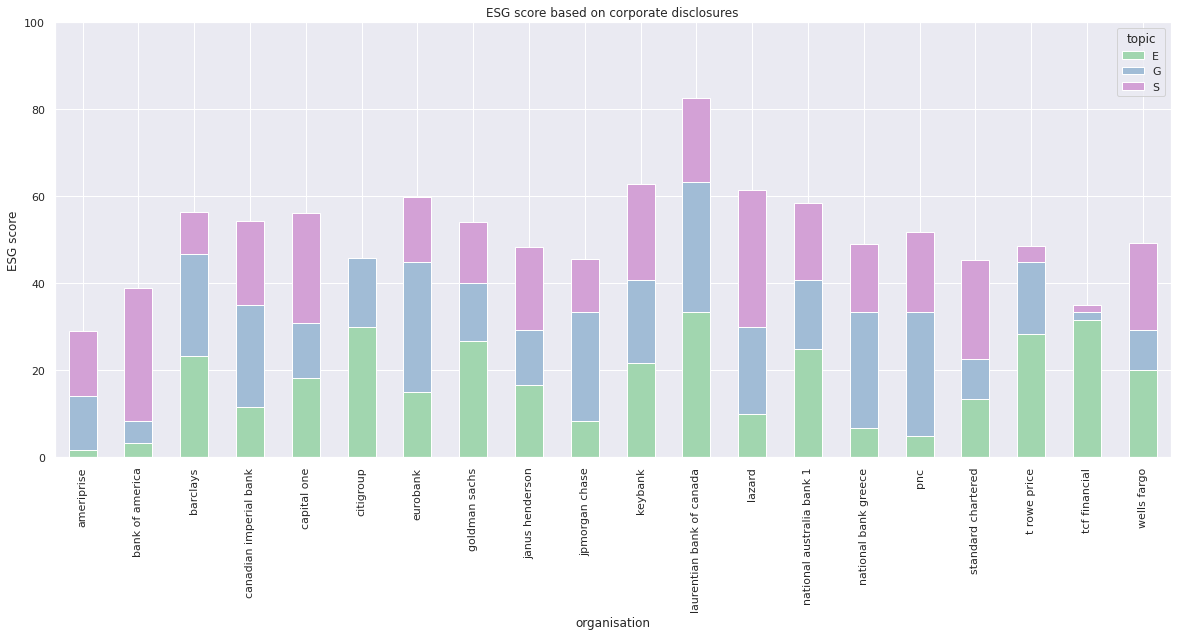

In [166]:
esg_csr_data.plot.bar(
  rot=90, 
  stacked=True, 
  color={"E": "#A1D6AF", "S": "#D3A1D6", "G": "#A1BCD6"},
  title='ESG score based on corporate disclosures',
  ylabel='ESG score',
  ylim=[0, 100],
  figsize=(20,8)
)